
 # <font color="blue">MIDTERM PROJECT (IMAGE CLASSIFICATION) </font>




### GEOGRAPHICAL INFORMATION SYSTEM COURSE By Ali JAMMALİ


**Name and Surname** : KABIR SALEH AHMADOU

**Student number** : 1810213013





#### IMPORTING NECESSARY LIBRARIES


In [134]:
from scipy.io import loadmat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 



# lOADING DATA
Karabuk_Pavia_Data = loadmat("Karabuk_Pavia_Data.mat")

In [135]:
print(Karabuk_Pavia_Data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'PaviaU', 'PaviaX', 'PaviaY'])


In [136]:
dataset= Karabuk_Pavia_Data["PaviaU"]

In [137]:
df=pd.DataFrame(dataset.reshape(42776,104))

df.to_csv("dataset.csv",index=False)

In [138]:
# LOOKING AT THE HEAD OF DATA

df.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,1467,1298,1298,1418,1408,1379,1350,1357,1424,1439,...,1387,1377,1399,1400,1370,1344,1346,1327,1315,1
1,1203,1295,1302,1330,1391,1416,1390,1335,1271,1313,...,1094,1084,1124,1144,1147,1165,1167,1144,1126,1
2,1341,1346,1272,1281,1168,1073,1127,1170,1187,1185,...,1154,1158,1174,1162,1150,1140,1128,1123,1101,1
3,761,454,413,414,467,427,342,346,414,494,...,1743,1694,1666,1690,1695,1685,1701,1734,1756,2
4,787,392,242,534,581,431,410,402,372,393,...,1465,1453,1451,1505,1543,1516,1527,1548,1511,2


In [139]:
# RETREIVING X and Y values

X = Karabuk_Pavia_Data["PaviaX"]
y = Karabuk_Pavia_Data["PaviaY"]
X.size

4405928

### DIVIDING DATA INTO TRAINING SET AND TEST SET


In [140]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

### TRAINING DATA


In [141]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train,y_train.ravel())

KNeighborsClassifier()

### MAKING PREDICTIONS


In [142]:
y_prediction1 = classifier.predict(X_test)

In [143]:
from sklearn.metrics import accuracy_score
print("Accuracy of Knn Classifier : ",accuracy_score(y_test,y_prediction1))

Accuracy of Knn Classifier :  0.908672952544222


In [144]:
# Using SDGClassifier
from sklearn.linear_model import SGDClassifier
sdg = SGDClassifier(random_state=42)
sdg.fit(X_train,y_train.ravel())


SGDClassifier(random_state=42)

In [145]:
y_prediction2 = sdg.predict(X_test)
print("Accuracy of Stotatic Gradien Descent Classifier : ",accuracy_score(y_test,y_prediction2))

Accuracy of Stotatic Gradien Descent Classifier :  0.7818125146107691


In [146]:
# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train.ravel())

RandomForestClassifier()

In [147]:
y_prediction3 = rfc.predict(X_test)
print("Accuracy of Classifier Random Forest Classifier: ",accuracy_score(y_test,y_prediction3))

Accuracy of Classifier Random Forest Classifier:  0.9395308969064131


### MODEL SELECTION

- The Stothatic Decent Gradient classifier has an accuracy of 0.78
- The Nearest Neighbor Classifier has an accuracy of 0.90
- The Random Forest Classifier has an accuracy of 0.93


**Decision :** So the Random Forest Classifier has the best overall accuracy (0.93), we select it as best model to use 


### LOADING DATA TO FEED OUR TRAINED MODEL

In [148]:
PaviaU = loadmat("PaviaU.mat")
print(PaviaU.keys())


dict_keys(['__header__', '__version__', '__globals__', 'paviaU'])


In [149]:
# LOADING DATA

data= PaviaU["paviaU"]

In [150]:
data.shape

(610, 340, 103)

In [151]:
## reshapıng our data
reshaped_data=np.reshape(data,(207400,103))

In [152]:
## Prediction

predicted_values = rfc.predict(reshaped_data)

### MAPPING OUR 2D matrix as a figure

In [153]:
predicted_values = np.reshape(predicted_values,(610,340))

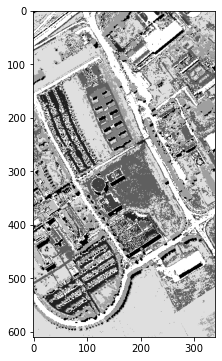

In [155]:
import matplotlib as mpl

plt.imshow(predicted_values,cmap=mpl.cm.binary)
plt.show()